# Linear Regression Model 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
air_df = pd.read_csv('airnew.csv', encoding = 'latin-1')
air_df['survey_date'] = pd.to_datetime(air_df['survey_date'])
air_df.movie_name = air_df.movie_name.astype('category')
air_df.gender_name = air_df.gender_name.astype('category')
air_df.ethnicity_name = air_df.ethnicity_name.astype('category')
air_df.live_with_children = air_df.live_with_children.astype('category')
air_df.head(5)

,rating,survey_date,respondent_id,movie_id,movie_name,gender_name,age_group_bracket,ethnicity_name,education_level,income_bracket,household_size,is_favorite,respondent_movie_id,all_soon_as_available,all_looking_forward,all_total_attention,all_best_option,all_no_rewatch,all_yes_rewatch,all_none_above,all_aware_before_release,home_background,home_surfing_channels,home_go_to,home_sig_other,home_no_phone,home_yes_phone,home_bits_pieces,social_talk_others,social_yes_recommend,social_none_above,intent_raw,intent_score,wave_id,age,zip_code,live_with_children,watch_last,intelligent,real,fun,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,funny,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,suspenseful,thrilling,scary
0,4,2020-01-18,743006,11549,Ad Astra,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,5,2020-01-18,743006,11679,Beetlejuice,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5,2020-01-18,743006,11692,Deliverance,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1
3,5,2020-01-18,743006,11708,Gremlins,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0
4,3,2020-01-18,743006,11748,Risky Business,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464323,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


## Create new Age_Category column

In [4]:
# Under 18 - 1
# 18 to 24 - 2
# 25 to 34 - 3
# 35 to 44 - 4
# 45 to 49 - 5
# 50 to 54 - 6
# 55 to 64 - 7
# 65 and Over - 8

conditions = [(air_df['age_group_bracket'] == 'Under 18'),
              (air_df['age_group_bracket'] == '18 to 24'),
              (air_df['age_group_bracket'] == '25 to 34'),
              (air_df['age_group_bracket'] == '35 to 44'),
              (air_df['age_group_bracket'] == '45 to 49'),
              (air_df['age_group_bracket'] == '50 to 54'),
              (air_df['age_group_bracket'] == '55 to 64'),
              (air_df['age_group_bracket'] == '65 and Over'),
]

values = [1, 2, 3, 4, 5, 6, 7, 8]

air_df['Age_Category'] = np.select(conditions, values)

## Create New Education Column

In [5]:
# Some High School - 1
# High School Diploma - 2
# Some College - 3
# College Degree - 4
# Some Higher Education - 5
# Higher Education - 6
# Prefer not to answer - 3

conditions = [(air_df['education_level'] == 'Some high school'),
              (air_df['education_level'] == 'High school diploma'),
              (air_df['education_level'] == 'Some college'),
              (air_df['education_level'] == 'College degree'),
              (air_df['education_level'] == 'Some higher education'),
              (air_df['education_level'] == 'Higher education'),
              (air_df['education_level'] == 'Prefer not to answer'),
             ]

values = [1, 2, 3, 4, 5, 6, 3]

air_df['Education'] = np.select(conditions, values)

## Create New Watch_Last Column

In [6]:
# The last week - 1
# 1 week to 1 month - 2
# 1 to 3 months - 3
# watch_last_3 to 6 months - 4
# In the last year - 5

conditions = [(air_df['watch_last'] == 'The last week'),
              (air_df['watch_last'] == '1 week to 1 month'),
              (air_df['watch_last'] == '1 to 3 months'),
              (air_df['watch_last'] == '3 to 6 months'),
              (air_df['watch_last'] == 'In the last year'),
             ]

values = [1, 2, 3, 4, 5]

air_df['Watch_Last'] = np.select(conditions, values)

## Create New Income Column

In [7]:
# Less than $15,000 - 1
# $15,000 - $24,999 - 2
# $25,000 - $34,999 - 3
# $35,000 - $49,999 - 4
# $50,000 - $74,999 - 5
# $75,000 - $99,999 - 6
# $100,000 - $149,999 - 7
# $150,000 - $249,999 - 8
# More than $250,000 - 9
# Prefer not to answer - 5

conditions = [(air_df['income_bracket'] == 'Less than $15,000'),
              (air_df['income_bracket'] == '$15,000 - $24,000'),
              (air_df['income_bracket'] == '$25,000 - $34,999'),
              (air_df['income_bracket'] == '$35,000 - $49,999'),
              (air_df['income_bracket'] == '$50,000 - $74,999'),
              (air_df['income_bracket'] == '$75,000 - $99,999'),
              (air_df['income_bracket'] == '$100,000 - $149,999'),
              (air_df['income_bracket'] == '$150,000 - $249,999'),
              (air_df['income_bracket'] == 'More than $250,000'),
              (air_df['income_bracket'] == 'Prefer not to answer'),
             ]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 5]

air_df['Income'] = np.select(conditions, values)

## Create New Household_Size Column 

In [8]:
# 1 - 1
# 2 - 2
# 3 - 3
# 4 - 4
# 5 - 5

conditions = [(air_df['household_size'] == "1"),
              (air_df['household_size'] == "2"),
              (air_df['household_size'] == "3"),
              (air_df['household_size'] == "4"),
              (air_df['household_size'] == "5+"),
             ]

values = [1, 2, 3, 4, 5]

air_df['Household_Size'] = np.select(conditions, values)

air_df.head(5)

,rating,survey_date,respondent_id,movie_id,movie_name,gender_name,age_group_bracket,ethnicity_name,education_level,income_bracket,household_size,is_favorite,respondent_movie_id,all_soon_as_available,all_looking_forward,all_total_attention,all_best_option,all_no_rewatch,all_yes_rewatch,all_none_above,all_aware_before_release,home_background,home_surfing_channels,home_go_to,home_sig_other,home_no_phone,home_yes_phone,home_bits_pieces,social_talk_others,social_yes_recommend,social_none_above,intent_raw,intent_score,wave_id,age,zip_code,live_with_children,watch_last,intelligent,real,fun,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,funny,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,suspenseful,thrilling,scary,Age_Category,Education,Watch_Last,Income,Household_Size
0,4,2020-01-18,743006,11549,Ad Astra,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7,3,4,6,2
1,5,2020-01-18,743006,11679,Beetlejuice,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,3,4,6,2
2,5,2020-01-18,743006,11692,Deliverance,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,7,3,5,6,2
3,5,2020-01-18,743006,11708,Gremlins,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,4,6,2
4,3,2020-01-18,743006,11748,Risky Business,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464323,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,5,6,2


## Create Dummy Variables

In [9]:
air_df = air_df.drop(['movie_name', 'survey_date', 'wave_id', 'zip_code', 'age', 'age_group_bracket',
                     'education_level', 'income_bracket', 'intent_raw', 'intent_score', 'respondent_id', 'movie_id', 
                     'respondent_movie_id', 'watch_last', 'is_favorite', 'household_size'], axis=1)
air_df = pd.get_dummies(air_df, drop_first=True)
air_df.head(5)

,rating,all_soon_as_available,all_looking_forward,all_total_attention,all_best_option,all_no_rewatch,all_yes_rewatch,all_none_above,all_aware_before_release,home_background,home_surfing_channels,home_go_to,home_sig_other,home_no_phone,home_yes_phone,home_bits_pieces,social_talk_others,social_yes_recommend,social_none_above,intelligent,real,fun,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,funny,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,suspenseful,thrilling,scary,Age_Category,Education,Watch_Last,Income,Household_Size,gender_name_Male,ethnicity_name_Asian,ethnicity_name_Decline to answer,ethnicity_name_Hispanic or Latino,ethnicity_name_Other (Specify:),ethnicity_name_White or Caucasian,live_with_children_True
0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7,3,4,6,2,1,0,0,1,0,0,0
1,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,3,4,6,2,1,0,0,1,0,0,0
2,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,7,3,5,6,2,1,0,0,1,0,0,0
3,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,4,6,2,1,0,0,1,0,0,0
4,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,5,6,2,1,0,0,1,0,0,0


In [10]:
air_df.to_excel("LM_Correlations.xlsx")

KeyboardInterrupt: 

## Stepwise Group 4

In [11]:
x_columns = ['home_surfing_channels', 'scary', 'all_aware_before_release', 'home_bits_pieces', 
             'ethnicity_name_White or Caucasian', 'mean', 'outrageous', 'ethnicity_name_Decline to answer', 
             'ethnicity_name_Other (Specify:)', 'home_yes_phone', 'gender_name_Male', 'ethnicity_name_Hispanic or Latino',
             'disturbing']
y = air_df['rating']

In [12]:
import statsmodels.api as sm
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                          8.314e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:06:39   Log-Likelihood:                     -4.9579e+05
No. Observations:              249284   AIC:                                  9.916e+05
Df Residuals:                  249271   BIC:                                  9.917e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Stepwise Group 3

In [13]:
x_columns = ['romantic', 'home_sig_other', 'fastpaced', 'wholesome', 'sexy', 'all_no_rewatch', 'sad', 'home_background',
             'all_best_option', 'all_yes_rewatch', 'edgy', 'glamorous', 'calming', 'live_with_children_True', 'Education',
             'Income', 'Age_Category', 'ethnicity_name_Asian', 'Household_Size', 'ethnicity_name_White or Caucasian',
             'ethnicity_name_Hispanic or Latino', 'ethnicity_name_Other (Specify:)', 'gender_name_Male', 
             'home_surfing_channels']
y = air_df['rating']

In [14]:
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                          1.100e+05
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:06:43   Log-Likelihood:                     -3.9909e+05
No. Observations:              249284   AIC:                                  7.982e+05
Df Residuals:                  249260   BIC:                                  7.985e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Stepwise Group 2

In [16]:
x_columns = ['home_no_phone', 'slow', 'touching', 'inspiring', 'predictable', 'fake', 'shallow', 'unrelatable', 'real',
             'thrilling', 'deep', 'home_go_to', 'dramatic', 'mindless', 'all_looking_forward', 'all_soon_as_available', 
             'fun', 'suspenseful', 'fresh', 'uplifting', 'relatable', 'imaginative', 'funny', 'informative', 
             'Household_Size', 'Age_Category', 'ethnicity_name_White or Caucasian', 'ethnicity_name_Hispanic or Latino',
             'Education', 'live_with_children_True']
y = air_df['rating']

In [17]:
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                          1.019e+05
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:06:50   Log-Likelihood:                     -3.8231e+05
No. Observations:              249284   AIC:                                  7.647e+05
Df Residuals:                  249254   BIC:                                  7.650e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Stepwise Group 1

In [18]:
x_columns = ['social_none_above', 'social_yes_recommend', 'all_total_attention', 'exciting', 'Watch_Last', 'all_none_above',
             'original', 'intelligent', 'unoriginal', 'social_talk_others', 'Household_Size', 'Age_Category', 'Education',
             'ethnicity_name_White or Caucasian', 'funny', 'ethnicity_name_Hispanic or Latino', 'live_with_children_True',
             'thrilling']
y = air_df['rating']

In [19]:
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          1.737e+05
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:06:50   Log-Likelihood:                     -3.7971e+05
No. Observations:              249284   AIC:                                  7.595e+05
Df Residuals:                  249266   BIC:                                  7.596e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Create Training and Validation Set

In [51]:
predictors = ['Household_Size', 'Age_Category', 'Education', 'Watch_Last', 'funny', 'all_total_attention', 
              'ethnicity_name_White or Caucasian', 'ethnicity_name_Hispanic or Latino', 'live_with_children_True', 
              'social_yes_recommend', 'exciting', 'thrilling', 'original']
              
outcome = 'rating'

x = air_df[predictors]
y = air_df[outcome]
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

## Create Regression Model

In [50]:
air_lm = LinearRegression()
air_lm.fit(train_x, train_y)

print(pd.DataFrame({'Predictor':x.columns, 'coefficient': air_lm.coef_}))

regressionSummary(train_y, air_lm.predict(train_x))

                            Predictor  coefficient
0                      Household_Size     0.018847
1                        Age_Category     0.023638
2                           Education     0.017434
3                          Watch_Last    -0.144360
4                               funny     0.196118
5                 all_total_attention     0.300989
6   ethnicity_name_White or Caucasian    -0.029500
7   ethnicity_name_Hispanic or Latino    -0.007283
8             live_with_children_True     0.081790
9                social_yes_recommend     0.339012
10                           exciting     0.286722
11                          thrilling     0.174856
12                           original     0.271699

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9076
            Mean Absolute Error (MAE) : 0.7353
          Mean Percentage Error (MPE) : -9.0441
Mean Absolute Percentage Error (MAPE) : 24.3145


## Test Model on Validation Set

In [45]:
air_lm_pred = air_lm.predict(valid_x)
result = pd.DataFrame({'Predicted': air_lm_pred, 'Actual': valid_y, 'Residual': valid_y - air_lm_pred})

print(result.head(10))

regressionSummary(valid_y, air_lm_pred)

        Predicted  Actual  Residual
141067   5.058942       5 -0.058942
127040   3.782399       3 -0.782399
55590    3.744802       5  1.255198
92616    3.769568       4  0.230432
49524    3.973262       3 -0.973262
730      3.677880       3 -0.677880
976      4.028009       5  0.971991
103041   3.625208       2 -1.625208
215799   3.891233       3 -0.891233
63960    3.629447       4  0.370553

Regression statistics

                      Mean Error (ME) : -0.0069
       Root Mean Squared Error (RMSE) : 0.9127
            Mean Absolute Error (MAE) : 0.7401
          Mean Percentage Error (MPE) : -9.3809
Mean Absolute Percentage Error (MAPE) : 24.6058


In [55]:
air_lm_test = air_lm.predict(train_x)
testresult = pd.DataFrame({'Predicted': air_lm_test, 'Actual': train_y, 'Residual': train_y - air_lm_test})
print(testresult.head(10))

regressionSummary(train_y, air_lm_test)

        Predicted  Actual  Residual
102303   4.878810       5  0.121190
190494   4.178497       3 -1.178497
95065    3.997896       4  0.002104
236175   3.745047       5  1.254953
112444   3.630187       4  0.369813
80680    3.878246       4  0.121754
106024   3.467738       4  0.532262
64026    3.297358       4  0.702642
204385   4.307541       4 -0.307541
135704   3.327742       2 -1.327742

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9076
            Mean Absolute Error (MAE) : 0.7353
          Mean Percentage Error (MPE) : -9.0441
Mean Absolute Percentage Error (MAPE) : 24.3145


0.9733136771165534


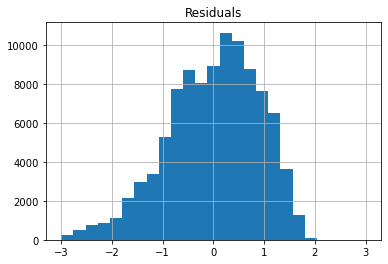

In [23]:
air_lm_pred = air_lm.predict(valid_x)
all_residuals = valid_y - air_lm_pred
print(len(all_residuals[(all_residuals > -2) & (all_residuals < 2)]) / len(all_residuals))

pd.DataFrame({'Residuals': all_residuals}).hist(bins=25, range=[-3, 3])
plt.show()

## Evaluate Performance

In [24]:
# training
regressionSummary(train_y, air_lm.predict(train_x))
# validation
regressionSummary(valid_y, air_lm.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9076
            Mean Absolute Error (MAE) : 0.7353
          Mean Percentage Error (MPE) : -9.0441
Mean Absolute Percentage Error (MAPE) : 24.3145

Regression statistics

                      Mean Error (ME) : -0.0069
       Root Mean Squared Error (RMSE) : 0.9127
            Mean Absolute Error (MAE) : 0.7401
          Mean Percentage Error (MPE) : -9.3809
Mean Absolute Percentage Error (MAPE) : 24.6058


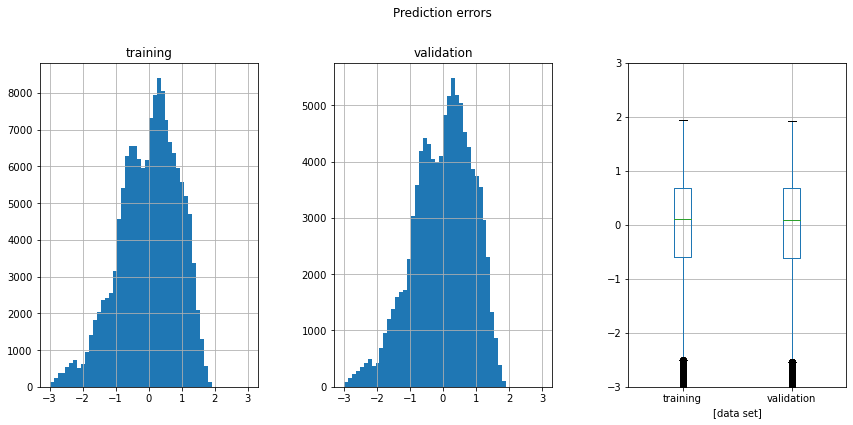

In [25]:
pred_error_train = pd.DataFrame({
    'residual': train_y - air_lm.predict(train_x), 
    'data set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - air_lm.predict(valid_x), 
    'data set': 'validation'
})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(14, 6)
common = {'bins': 50, 'range': [-3, 3]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-3, 3)
plt.suptitle('Prediction errors') 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

Text(0.5, 1.0, 'Cumulative Gains Chart')

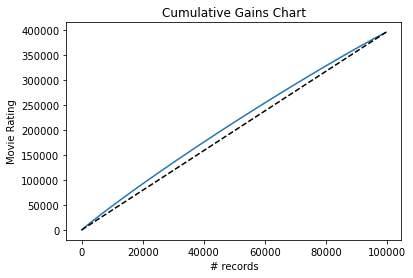

In [26]:
# Gains Chart

pred_v = pd.Series(air_lm.predict(valid_x))
pred_v = pred_v.sort_values(ascending=False)
pred_v

ax = gainsChart(pred_v)
ax.set_ylabel('Movie Rating')
ax.set_title('Cumulative Gains Chart')

Text(0, 0.5, 'Lift')

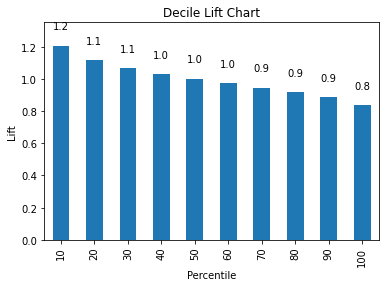

In [27]:
# Lift Chart

ax = liftChart(pred_v)
ax.set_ylabel('Lift')

In [28]:
result.head(10)

,Predicted,Actual,Residual
141067,5.058942,5,-0.058942
127040,3.782399,3,-0.782399
55590,3.744802,5,1.255198
92616,3.769568,4,0.230432
49524,3.973262,3,-0.973262
730,3.677880,3,-0.677880
976,4.028009,5,0.971991
103041,3.625208,2,-1.625208
215799,3.891233,3,-0.891233
63960,3.629447,4,0.370553


In [29]:
result.to_excel("LMOutput.xlsx")

KeyboardInterrupt: 